# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width   


In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt


In [ ]:
# Ploting clustering results in colors
def plot_clusters(X, clusters, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    k,_ = np.shape(centroids)

    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=150, c='y')

# K-means algorithm

In [ ]:
def kmeans(X):
  k=2
  N = len(X)
  ctr1 = X[(np.random.randint(0,N)),:]   # Randomly select initial centroid 1
  ctr2 = X[(np.random.randint(0,N)),:]   # Randomly select initial centroid 2

  centroids = np.array(list(zip(ctr1, ctr2)), dtype=np.float32)  # Create an array of centroids for each cluster
  clusters = np.zeros(len(X))   # Initialize the clusters

  MAX_ITR = 100   # Define the maximum number of iterations
  update = deepcopy(centroids)   # Deep copy the centroids array to update it later

  for itr in range(MAX_ITR):
    sum0 , sum1 = np.zeros(2) , np.zeros(2)
    count0 , count1 = 0 , 0
    for i in range(len(X)):
      if np.linalg.norm(centroids[0]-X[i]) < np.linalg.norm(centroids[1]-X[i]):
        clusters[i] = 0
        sum0 = sum0 + X[i]
        count0 += 1
      else:
        clusters[i] = 1
        sum1 = sum1 + X[i]
        count1 +=1

    update[0][0] = sum0[0]/count0   # Calculate the new centroid for cluster 0
    update[0][1] = sum0[1]/count0
    update[1][0] = sum1[0]/count1   # Calculate the new centroid for cluster 1
    update[1][1] = sum1[1]/count1

    if np.linalg.norm(centroids[0]-update[0]) == 0 and np.linalg.norm(centroids[1]-update[1]) == 0:
      break   # Break out of the loop if the centroids do not change anymore
    else:
      centroids[0] = update[0]   # Update the centroids array with the new centroid positions
      centroids[1] = update[1]

  print('Algorithm converges after {} iterations'. format(itr))   # Print the number of iterations taken to converge
  return clusters, centroids   # Return the cluster assignments and centroids

Mounted at /content/drive
Algorithm converges after 6 iterations


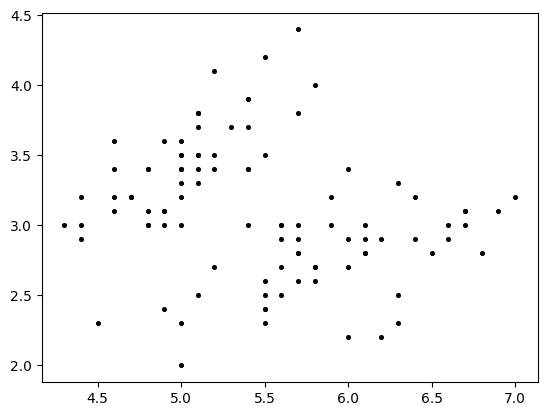

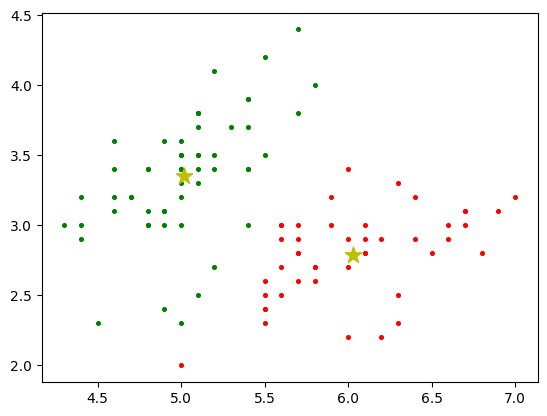

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

directory_path = '/content/drive/MyDrive/Colab Notebooks/hw6/'
df = pd.read_csv(directory_path+"simple_iris_dataset.csv")

df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)

clusters, centroids = kmeans(X)

plot_clusters(X, clusters, centroids)
